In [2]:
import matplotlib.pyplot as plt
from coffea.util import load
from pocket_coffea.utils.plot_utils import Shape
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
display(HTML("<style>.output_png { height: auto; }</style>"))
import pickle
import numpy as np
import os
if not os.path.exists('hists'):
    os.makedirs('hists')
import awkward as ak
from omegaconf import OmegaConf
import math
import mplhep as hep

In [3]:
o = load("out_columns/output_allColumns_2018.coffea")
o2 = load("output_newconfig11_TTbbDiLeptonic_Powheg_2018.coffea")
parameters_dump = OmegaConf.load("/afs/cern.ch/user/r/rmccarth/public/plotting_style.yaml")

In [8]:
print(o['columns'].keys())
print(o['columns']['ZJetsToQQ_HT600to800__nominal']['ZJetsToQQ_HT600to800_v7__2018']["baseline"].keys())

dict_keys(['ZJetsToQQ_HT600to800__nominal', 'ZJetsToQQ_HT400to600__nominal', 'QCD_HT2000toInf__nominal', 'QCD_HT1000to1500__nominal', 'QCD_HT700to1000__nominal', 'TTWJetsToLNu__nominal', 'ZJetsToQQ_HT800toInf__nominal', 'DYJetsToLL_M-50__nominal', 'TTToSemiLeptonic__nominal', 'TTToHadronic__nominal', 'ST_s-channel_4f_leptonDecays__nominal', 'ST_t-channel_antitop_4f_InclusiveDecays__nominal', 'ST_t-channel_top_4f_InclusiveDecays__nominal', 'WJetsToQQ_HT800toInf__nominal', 'WJetsToQQ_HT600to800__nominal', 'WJetsToQQ_HT400to600__nominal', 'ST_tW_top_5f_inclusiveDecays__nominal', 'ST_tW_antitop_5f_inclusiveDecays__nominal', 'TTTo2L2Nu__nominal', 'TTGJets__nominal', 'THW__nominal', 'WW__nominal', 'WZ__nominal', 'ZZ__nominal', 'WJetsToLNu_HT-800To1200__nominal', 'WJetsToLNu_HT-2500ToInf__nominal', 'WJetsToLNu_HT-1200To2500__nominal', 'TTWJetsToQQ__nominal', 'TTZtoLLNuNu__nominal', 'WJetsToLNu_HT-600To800__nominal', 'WJetsToLNu_HT-200To400__nominal', 'TTZToQQ__nominal', 'DATA_SingleMuon__nomi

In [18]:
def getName(sam_name):
    sam_namey = sam_name+'__2018'
    if 'ttHToNonbb' in sam_name: sam_namey ='ttHToNonbb_Powheg_2018'
    if 'DYJetsToLL_M-50' in sam_name: sam_namey ='DYJetsToLL_M-50_v7__2018'
    if 'ZJetsToQQ' in sam_name: sam_namey = sam_name + '_v7__2018'
    if 'ST' in sam_name: sam_namey = sam_name + '_v7__2018'
    if 'QCD' in sam_name: sam_namey = sam_name + '_v7__2018'
    if 'WJets' in sam_name: sam_namey = sam_name + '_v7__2018' 
    if 'WJetsToLNu' in sam_name: sam_namey = sam_name + '__2018'
    if 'TTWJets' in sam_name: sam_namey = sam_name + '__2018'
    if 'TTGJets' in sam_name: sam_namey = sam_name + '__2018'
    if 'THW' in sam_name: sam_namey = sam_name + '__2018'
    if 'WW' in sam_name: sam_namey = sam_name + '__2018'
    if 'WZ' in sam_name: sam_namey = sam_name + '__2018'
    if 'ZZ' in sam_name: sam_namey = sam_name + '__2018'
    if 'ttHTobb' in sam_name: sam_namey = sam_name + '_2018'
    return sam_namey

def getPlotParams(var):
    #return format: bins, xmin, xmax, label
    col = var.split("_")[0]
    quantity = var.split("_")[1]
    if quantity == 'eta':
        return 30, -2.5, 2.5, fr"{col} $\eta$"
    if quantity == 'phi':
        return 32, -math.pi, math.pi, fr"{col} $\phi$"
    if ("FatJet" in col) and not ("N" in quantity) and not ("Flavour" in quantity):
        if quantity == 'pt':
            return 100, 0, 1000, r"FatJet $p_{T}$ [GeV]"
        elif quantity == 'mass':
            return 50, 0, 400, r"FatJet mass [GeV]"
        elif quantity == 'msoftdrop':
            return 50, 0, 400, r"FatJet $m_{SD}$ [GeV]"
        elif quantity == 'rho':
            return 100, -8, 0, r"FatJet $\rho$"
        elif quantity == 'rhoQCD':
            return 100, -3, 0.5, r"FatJet $\rho$QCD"
        elif quantity == 'tau1':
            return 20, 0, 1, r"$\tau_{1}$"
        elif quantity == 'tau2':
            return 20, 0, 1, r"$\tau_{2}$"
        elif quantity == 'tau3':
            return 20, 0, 1, r"$\tau_{3}$"
        elif quantity == 'tau4':
            return 20, 0, 1, r"$\tau_{4}$"
        else:
            return 20, 0, 1, f"{col}"
    elif "Jet" in col and not ("N" in quantity)and not ("Flavour" in quantity):
        if quantity == 'pt':
            return 100, 0, 1000, r"Jet $p_{T}$ [GeV]"
        elif quantity == 'btagDeepFlavB':
            return 30, 0, 1, "AK4 DeepJet b-tag score"
        elif quantity == 'mass':
            return 50, 0, 400, r"Jet mass [GeV]"
    else:
        return -1, -1, -1, ""
    
def deltaR(phis,etas):
    leftPhi,rightPhi = ak.unzip(phis)
    leftEta,rightEta = ak.unzip(etas)
    return np.sqrt(pow(leftEta-rightEta,2)+pow(leftPhi-rightPhi,2))


In [24]:
#Calculate and append new branches for plotting
for sample in o['columns'].keys():
    for year in o['columns'][sample].keys():
        for cat in o['columns'][sample][year].keys():
            leptonsPhi = ak.from_numpy(o['columns'][sample][year][cat]['LeptonGood_phi'].value)
            leptonsEta = ak.from_numpy(o['columns'][sample][year][cat]['LeptonGood_eta'].value)
            leptonsN = ak.from_numpy(o['columns'][sample][year][cat]['LeptonGood_N'].value)
            leptonsPhi = ak.unflatten(leptonsPhi,leptonsN)
            print("leptonsPhi",leptonsPhi)
            leptonsPhi = ak.to_list(ak.combinations(leptonsPhi,2))
            leptonsEta = ak.unflatten(leptonsEta,leptonsN)
            print("leptonsEta",leptonsEta)
            leptonsEta = ak.to_list(ak.combinations(leptonsEta,2))
            print("leptonsPhi combinations",leptonsPhi)
            print("leptonsEta combinations",leptonsEta)
            leptonsDeltaR = deltaR(leptonsPhi,leptonsEta)
            print(leptonsDeltaR)
            o['columns'][sample][year][cat]['LeptonGood_deltaR'] = leptonsDeltaR

leptonsPhi [[1.45, 2.43], [1.2, -2.3], [0.122, 3.11], [-1.68, -2.57], [-0.831, -0.255]]
leptonsEta [[1.89, 1.34], [1.15, 0.89], [-1.66, 0.14], [-0.532, -1.38], [1.44, 2.07]]
leptonsPhi combinations [[(1.4521484375, 2.43359375)], [(1.202392578125, -2.30419921875)], [(0.122406005859375, 3.1083984375)], [(-1.678466796875, -2.5654296875)], [(-0.831298828125, -0.25506591796875)]]
leptonsEta combinations [[(1.890380859375, 1.33984375)], [(1.1474609375, 0.89013671875)], [(-1.662353515625, 0.139923095703125)], [(-0.5316162109375, -1.37646484375)], [(1.444580078125, 2.06591796875)]]
[[1.13], [3.52], [3.49], [1.22], [0.847]]
leptonsPhi []
leptonsEta []
leptonsPhi combinations []
leptonsEta combinations []


ValueError: not enough values to unpack (expected 2, got 1)

2018 baseline JetGood_eta


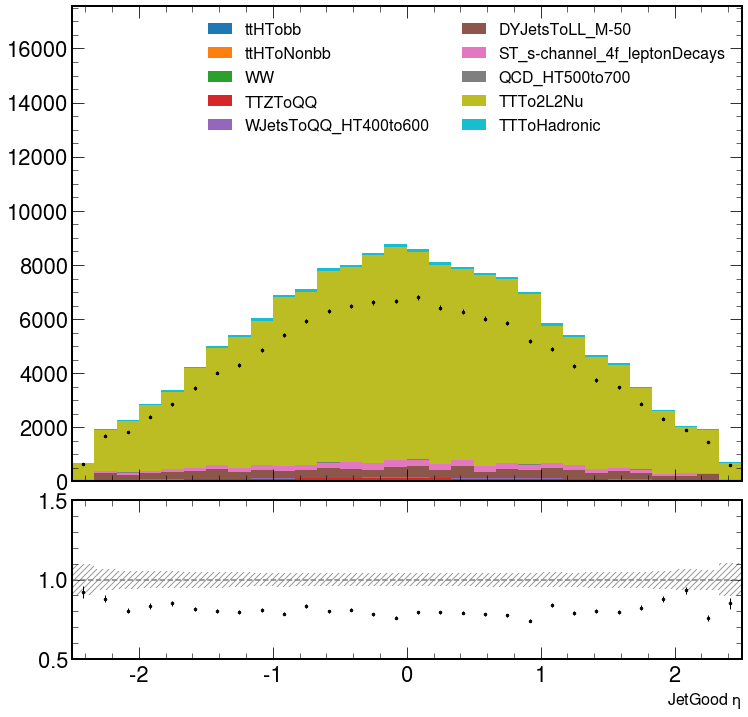

2018 ee JetGood_eta


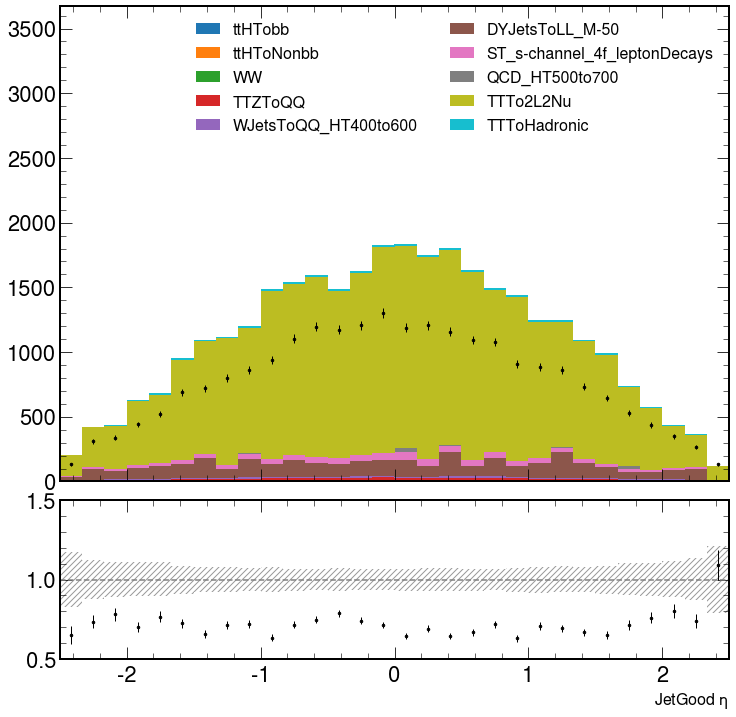

2018 emu JetGood_eta


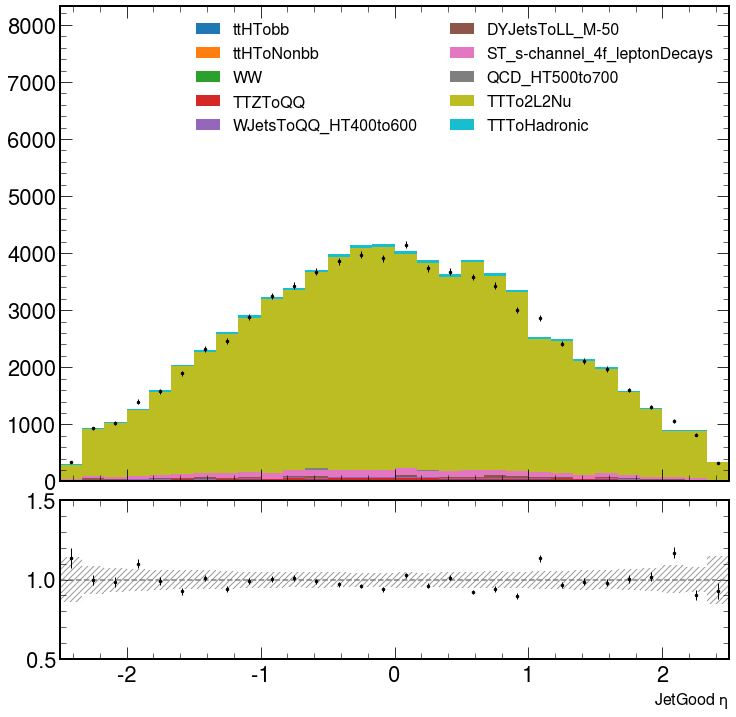

2018 mumu JetGood_eta


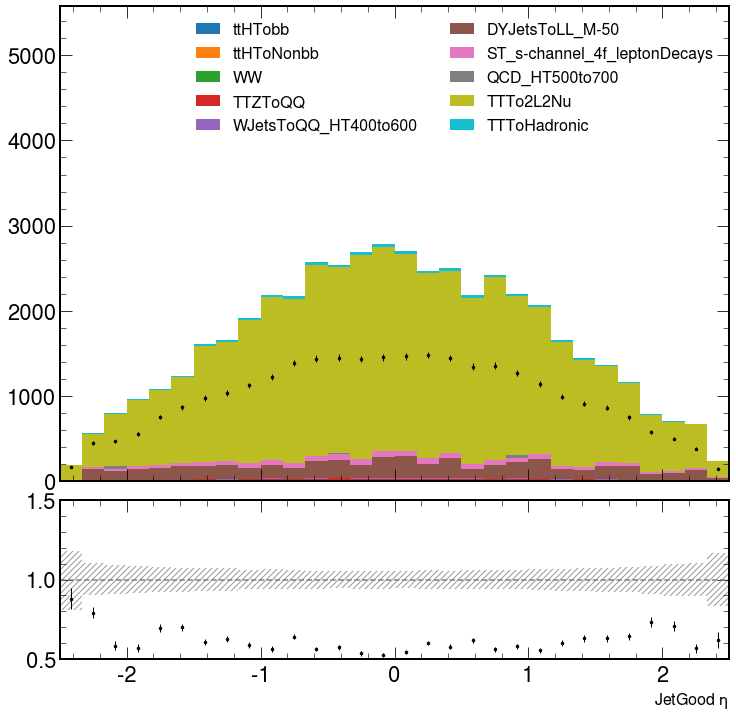

In [25]:
#User parameters
years = ["2018"]
cats = ["baseline","ee","emu","mumu"]
first_sample = 'TTTo2L2Nu' #any sample which contains all columns requested for plotting
vars = ['JetGood_eta'] #columns to plot, leave empty for all columns
modifier = "pt_1" #which objects to plot per event, options are: 'pt_#' where # goes from 1 to N with 1 being the leading pt object
                  #                                              'max' which plots the highest value of the parameter per event
                  #                                              'all' which plots all values of the parameter per event

dataSamples = []
for sample in o['columns'].keys():
    if 'DATA' in sample:
        dataSamples.append(sample)

for year in years:
    for cat in cats:
        if(not len(vars)):
            vars = o['columns'][first_sample+"__nominal"][getName(first_sample)][cat].keys()
        for var in vars:
            if(("weight" in var) or ("Idx" in var) or ("Ttbar" in var)):
                continue
            print(year, cat, var)
            col = var.split("_")[0]
            quantity = var.split("_")[1]
            all_MC = {}
            all_weight = {}
            for label, samples in parameters_dump['plotting_style']['samples_groups'].items():
                label_data = []
                label_weight = {}
                for sample in samples:
                    weight = {}
                    ttbb_weight = {}
                    name = getName(sample)
                    if(("V2" in var) and ("v7" in name)):
                        data = ak.from_numpy(o['columns'][sample+"__nominal"][name][cat][var[:-2]].value)
                    else:
                        data = ak.from_numpy(o['columns'][sample+"__nominal"][name][cat][var].value)
                    
                    for weightVar in o['columns'][first_sample+"__nominal"][getName(first_sample)][cat].keys():          
                        if ("weight" in weightVar):
                            weight[weightVar] = ak.from_numpy(o['columns'][sample+"__nominal"][name][cat][weightVar].value)
                            weight[weightVar] = weight[weightVar] / o['sum_genweights'][name]
                    A = o['sum_genweights_ttB'][name]
                    if(sample=="TTTo2L2Nu"):
                        genTtbarId = ak.from_numpy(o['columns'][sample+"__nominal"][name][cat]["events_genTtbarId"].value) % 100
                        tt_ttb_mask = genTtbarId > 50
                        for key in weight:
                            weight[key] = weight[key][~tt_ttb_mask]
                        if(("V2" in var) and ("v7" in name)):
                            ttbb_data = ak.from_numpy(o2['columns']['TTbbDiLeptonic__nominal']['TTbbDiLeptonic_Powheg_2018'][cat][var[:-2]].value)
                        else:
                            ttbb_data = ak.from_numpy(o2['columns']['TTbbDiLeptonic__nominal']['TTbbDiLeptonic_Powheg_2018'][cat][var].value)
                        genTtbarId = ak.from_numpy(o2['columns']['TTbbDiLeptonic__nominal']['TTbbDiLeptonic_Powheg_2018'][cat]["events_genTtbarId"].value) % 100
                        ttbb_ttb_mask = genTtbarId > 50
                        B = o2['sum_genweights_ttB']['TTbbDiLeptonic_Powheg_2018']
                        for weightVar in o['columns'][first_sample+"__nominal"][getName(first_sample)][cat].keys():
                            if ("weight" in weightVar):
                                ttbb_weight[weightVar] = ak.from_numpy(o2['columns']['TTbbDiLeptonic__nominal']['TTbbDiLeptonic_Powheg_2018'][cat][weightVar].value)
                                ttbb_weight[weightVar] = ttbb_weight[weightVar] / o2['sum_genweights']['TTbbDiLeptonic_Powheg_2018']
                                ttbb_weight[weightVar] = ttbb_weight[weightVar][ttbb_ttb_mask]
                                ttbb_weight[weightVar] = ttbb_weight[weightVar] * (A/B)
                            
                        if(quantity!="N" and col!="events"):
                            colN = ak.from_numpy(o['columns'][sample+"__nominal"][name][cat][col+"_N"].value)
                            data = ak.unflatten(data,colN)
                            pt_data = ak.from_numpy(o['columns'][sample+"__nominal"][name][cat][col+"_pt"].value)
                            pt_data = ak.unflatten(pt_data,colN)
                            sortIndices = ak.argsort(pt_data,ascending=False)
                            data = data[sortIndices]
                            ttbb_colN = ak.from_numpy(o2['columns']['TTbbDiLeptonic__nominal']['TTbbDiLeptonic_Powheg_2018'][cat][col+"_N"].value)
                            ttbb_data = ak.unflatten(ttbb_data,ttbb_colN)
                            ttbb_pt_data = ak.from_numpy(o2['columns']['TTbbDiLeptonic__nominal']['TTbbDiLeptonic_Powheg_2018'][cat][col+"_pt"].value)
                            ttbb_pt_data = ak.unflatten(ttbb_pt_data,ttbb_colN)
                            sortIndices = ak.argsort(ttbb_pt_data,ascending=False)
                            ttbb_data = ttbb_data[sortIndices]
                            if "pt" in modifier:
                                index = int(modifier.split("_")[1]) - 1
                                ttbb_data = ak.mask(ttbb_data, ak.num(ttbb_data) > 1)[:, index]
                                data = ak.mask(data, ak.num(data) > 1)[:, index]
                            elif modifier=="max":
                                data = ak.max(data,axis=1)
                                ttbb_data = ak.max(ttbb_data,axis=1)
                        data = data[~tt_ttb_mask]
                        ttbb_data = ttbb_data[ttbb_ttb_mask]
                        data = ak.concatenate((data,ttbb_data),axis=0)
                        for key in weight:
                            weight[key] = ak.concatenate((weight[key],ttbb_weight[key]),axis=0)
                    
                    elif(quantity!="N" and col!="events"):
                        colN = ak.from_numpy(o['columns'][sample+"__nominal"][name][cat][col+"_N"].value)
                        data = ak.unflatten(data,colN)
                        pt_data = ak.from_numpy(o['columns'][sample+"__nominal"][name][cat][col+"_pt"].value)
                        pt_data = ak.unflatten(pt_data,colN)
                        sortIndices = ak.argsort(pt_data,ascending=False)
                        data = data[sortIndices]
                        if "pt" in modifier:
                            index = int(modifier.split("_")[1]) - 1
                            data = ak.mask(data, ak.num(data) > 1)[:, index]
                        elif modifier=="max":
                            data = ak.max(data,axis=1)
                    for key in weight:
                        weight[key], data = ak.broadcast_arrays(weight[key],data)
                        if(modifier=="all"):
                            weight[key] = ak.flatten(weight[key])
                    if(modifier=="all"): 
                        data = ak.flatten(data)
                    none_mask = ak.is_none(data)
                    data = data[~none_mask]
                    for key in weight:
                        weight[key] = weight[key][~none_mask]
                    inf_mask = np.isinf(data)
                    data = data[~inf_mask]
                    for key in weight:
                        weight[key] = weight[key][~inf_mask]
                    label_data = ak.concatenate((label_data,data),axis=0)
                    for key in weight:
                        if key not in label_weight:
                            label_weight[key] = []
                        label_weight[key] = ak.concatenate((label_weight[key],weight[key]),axis=0)
                all_MC[label] = label_data
                for key in label_weight:
                    if key not in all_weight:
                        all_weight[key] = {}
                    all_weight[key][label] = label_weight[key]
                
            bins, xmin, xmax, xlabel = getPlotParams(var)
            plt.style.use([hep.style.ROOT, {'font.size': 22}])
            f2, a2 = plt.subplots()
            if not ("Gen" in var) and not ("gen" in var):
                fig, (ax, rax) = plt.subplots(2, 1, figsize=[12,12], gridspec_kw={"height_ratios": [3,1]}, sharex=True)
                fig.subplots_adjust(hspace=0.06)
                if(bins==-1):
                    n, bin_edges, patches = ax.hist(list(all_MC.values()),weights=list(all_weight["weight_nominal"].values()),stacked=True,label=list(all_MC.keys()))
                else:
                    n, bin_edges, patches = ax.hist(list(all_MC.values()),weights=list(all_weight["weight_nominal"].values()),stacked=True,label=list(all_MC.keys()),bins=bins,range=(xmin,xmax))
                n_sys = {}
                for key in all_weight:
                    if "Down" in key:
                        continue
                    downString = key[:-2]+"Down"
                    err2_up_total = np.zeros_like(n[-1])
                    err2_down_total = np.zeros_like(n[-1])
                    for label in all_weight[key]:
                        if key=="weight_nominal":
                            mcstat_err2 = np.histogram(all_MC[label], bins=bin_edges, weights=all_weight[key][label]**2)[0]
                            err2_up_total += mcstat_err2
                            err2_down_total += mcstat_err2
                        else:
                            hist_n_up, hist_bins_up = np.histogram(all_MC[label],weights=all_weight[key][label],bins=bin_edges)
                            hist_n_down, hist_bins_down = np.histogram(all_MC[label],weights=all_weight[downString][label],bins=bin_edges)
                            hist_n, hist_bins = np.histogram(all_MC[label],weights=all_weight["weight_nominal"][label],bins=bin_edges)
                            err_up = hist_n_up - hist_n
                            err_down = hist_n_down - hist_n
                            # Compute the flags to check which of the two variations (up and down) are pushing the nominal value up and down
                            up_is_up = err_up > 0
                            down_is_down = err_down < 0
                            # Compute the flag to check if the uncertainty is one-sided, i.e. when both variations are up or down
                            is_onesided = up_is_up ^ down_is_down
                            # Sum in quadrature of the systematic uncertainties taking into account if the uncertainty is one- or double-sided
                            err2_up_twosided = np.where(up_is_up, err_up**2, err_down**2)
                            err2_down_twosided = np.where(up_is_up, err_down**2, err_up**2)
                            err2_max = np.maximum(err2_up_twosided, err2_down_twosided)
                            err2_up_onesided = np.where(is_onesided & up_is_up, err2_max, 0)
                            err2_down_onesided = np.where(is_onesided & down_is_down, err2_max, 0)
                            err2_up_combined = np.where(is_onesided, err2_up_onesided, err2_up_twosided)
                            err2_down_combined = np.where(
                                is_onesided, err2_down_onesided, err2_down_twosided
                            )
                            err2_up_total += err2_up_combined
                            err2_down_total += err2_down_combined
                    n_sys[key] = err2_up_total
                    n_sys[downString] = err2_down_total
                ax.tick_params(axis='x', labelsize=22)
                ax.tick_params(axis='y', labelsize=22)
                ax.set_xlim(bin_edges[0],bin_edges[-1])
                #systematic error band
                err2_up = np.zeros_like(n[-1])
                err2_down = np.zeros_like(n[-1])
                for key in n_sys:
                    if "Down" in key:
                        continue
                    downString = key[:-2]+"Down"
                    err2_up += n_sys[key]
                    err2_down += n_sys[downString]
                up = n[-1] + np.sqrt(err2_up)
                down = n[-1] - np.sqrt(err2_down)
                ratio_up = np.where(n[-1] != 0, up / n[-1], 1)
                ratio_down = np.where(n[-1] != 0, down / n[-1], 1)
                unc_band = np.array([ratio_down, ratio_up])
                
                rax.fill_between(
                    bin_edges,
                    np.r_[unc_band[0], unc_band[0, -1]],
                    np.r_[unc_band[1], unc_band[1, -1]],
                    label="syst. unc.",
                    color= [0.,0.,0.,0.4],
                    facecolor= [0.,0.,0.,0.],
                    hatch= "////",
                    linewidth= 0,
                    step= 'post',
                    zorder= 2
                )
                rax.hlines(
                    1.0, *bin_edges[[0, -1]], colors='gray', linestyles='dashed'
                )
                
                ax.legend(ncol=2,loc="upper right",fontsize=16)
                plt.xlabel(xlabel,fontsize=16)
                nData = [0.0]*len(bin_edges[:-1])
                for sample in dataSamples:
                    for name in o['columns'][sample].keys():
                        data = ak.from_numpy(o['columns'][sample][name][cat][var].value)
                        if(quantity!="N" and col!="events"):
                            colN = ak.from_numpy(o['columns'][sample][name][cat][col+"_N"].value)
                            data = ak.unflatten(data,colN)
                            pt_data = ak.from_numpy(o['columns'][sample][name][cat][col+"_pt"].value)
                            pt_data = ak.unflatten(pt_data,colN)
                            sortIndices = ak.argsort(pt_data,ascending=False)
                            data = data[sortIndices]
                            if "pt" in modifier:
                                index = int(modifier.split("_")[1]) - 1
                                data = ak.mask(data, ak.num(data) > 1)[:, index]
                            elif modifier=="max":
                                data = ak.max(data,axis=1)
                        none_mask = ak.is_none(data)
                        data = data[~none_mask]
                        inf_mask = np.isinf(data)
                        data = data[~inf_mask]
                        if(modifier=="all"):
                            data = ak.flatten(data)
                        n_data, bin_edges_data, patches_data = a2.hist(data,bins=bin_edges)
                        nData += n_data
                error = np.sqrt(nData)
                binCenters = (bin_edges_data[:-1] + bin_edges_data[1:]) / 2
                ratio = nData/n[-1]
                ratio_error = error/n[-1]
                ratio_error[np.isnan(ratio_error)] = np.inf
                ax.errorbar(binCenters, nData, yerr=error,linestyle='solid',markersize=5.0,color='black',elinewidth=1,linewidth=0,marker='.')
                rax.errorbar(binCenters, ratio, yerr=ratio_error,linestyle='solid',markersize=5.0,color='black',elinewidth=1,linewidth=0,marker='.')
                rax.set_ylim((0.5, 1.5))
                rax.yaxis.set_label_coords(-0.075, 1)
                rax.tick_params(axis='x', labelsize=22)
                rax.tick_params(axis='y', labelsize=22)
                max_data = max(nData)
                max_MC = max(n[-1])
                if(max_data>max_MC):
                    ax.set_ylim((0, 2.0 * max_data))
                else:
                    ax.set_ylim((0, 2.0 * max_MC))
            else:
                f1, a1 = plt.subplots()
                if(bins==-1):
                    n, bin_edges, patches = a1.hist(list(all_MC.values()),weights=list(all_weight["weight_nominal"].values()),stacked=True,label=list(all_MC.keys()))
                else:
                    n, bin_edges, patches = a1.hist(list(all_MC.values()),weights=list(all_weight["weight_nominal"].values()),stacked=True,label=list(all_MC.keys()),bins=bins,range=(xmin,xmax))
                ax.legend(ncol=2,loc="upper right")
            
            plt.close(f2)
            plt.savefig("hists/"+year+"_"+cat+"_"+var+".pdf")
            plt.show()
            plt.clf()
            plt.cla()
            plt.close()